In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\gamezone_orders_data_cleaned.csv"
df = pd.read_csv(
    file_path,
    parse_dates=['purchase_ts_cleaned', 'ship_ts'],
    dtype={
        'purchase_year': 'Int64',
        'purchase_month': 'Int64',
        'time_to_ship': 'Int64',
        'revenue': 'float'
    },
    encoding='utf-8',
    keep_default_na=False,
    na_values=['']  # Only treat empty strings as NaN
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   user_id                          21864 non-null  object        
 1   order_id                         21864 non-null  object        
 2   purchase_ts                      21864 non-null  object        
 3   purchase_ts_cleaned              21863 non-null  datetime64[ns]
 4   purchase_year                    21864 non-null  Int64         
 5   purchase_month                   21864 non-null  Int64         
 6   time_to_ship                     21864 non-null  Int64         
 7   ship_ts                          21864 non-null  datetime64[ns]
 8   product_name                     21864 non-null  object        
 9   product_name_cleaned             21864 non-null  object        
 10  product_id                       21864 non-null  object   

In [2]:
df['order_id'].nunique()

21717

In [3]:
# Ensure datetime
df['purchase_ts_cleaned'] = pd.to_datetime(df['purchase_ts_cleaned'])

# Create year-month column
df['year_month'] = df['purchase_ts_cleaned'].dt.to_period('M')

# --- 1. Calculate Monthly Active Buyers (unique users per month)
mab = (
    df.groupby('year_month')['user_id']
      .nunique()
      .rename('mab')
      .to_frame()
)

# Convert PeriodIndex → Timestamp for easier pct change
mab.index = mab.index.to_timestamp()

# --- 2. Calculate MoM %
mab['mom_pct'] = mab['mab'].pct_change() * 100

# --- 3. Calculate YoY %
mab['yoy_pct'] = mab['mab'].pct_change(12) * 100

# --- Final table
mab = mab.reset_index().rename(columns={'year_month': 'month'})
mab


,month,mab,mom_pct,yoy_pct
0,2019-01-01,419,NaN,NaN
1,2019-02-01,318,-24.105012,NaN
2,2019-03-01,518,62.893082,NaN
3,2019-04-01,530,2.316602,NaN
4,2019-05-01,501,-5.471698,NaN
5,2019-06-01,474,-5.389222,NaN
6,2019-07-01,501,5.696203,NaN
7,2019-08-01,528,5.389222,NaN
8,2019-09-01,577,9.280303,NaN
9,2019-10-01,492,-14.731369,NaN


In [4]:
# Month key
df['year_month'] = df['purchase_ts_cleaned'].dt.to_period('M')

# --- 1. Monthly Active Buyers (unique users per month)
mab = (
    df.groupby('year_month')['user_id']
      .nunique()
      .rename('mab')
      .to_frame()
)

# Convert PeriodIndex → Timestamp to support pct_change
mab.index = mab.index.to_timestamp()

# --- 2. MoM change %
mab['mom_change_pct'] = mab['mab'].pct_change() * 100

# --- 3. YoY change % (12-month difference)
mab['yoy_change_pct'] = mab['mab'].pct_change(12) * 100

# Final tidy format
mab = mab.reset_index().rename(columns={'year_month': 'month'})
mab


,month,mab,mom_change_pct,yoy_change_pct
0,2019-01-01,419,NaN,NaN
1,2019-02-01,318,-24.105012,NaN
2,2019-03-01,518,62.893082,NaN
3,2019-04-01,530,2.316602,NaN
4,2019-05-01,501,-5.471698,NaN
5,2019-06-01,474,-5.389222,NaN
6,2019-07-01,501,5.696203,NaN
7,2019-08-01,528,5.389222,NaN
8,2019-09-01,577,9.280303,NaN
9,2019-10-01,492,-14.731369,NaN


In [5]:
import pandas as pd

# Ensure datetime
df['purchase_ts_cleaned'] = pd.to_datetime(df['purchase_ts_cleaned'])

# Month key
df['year_month'] = df['purchase_ts_cleaned'].dt.to_period('M')

# --- 1. Monthly Active Buyers (unique users per month)
mab = (
    df.groupby('year_month')['user_id']
      .nunique()
      .rename('mab')
      .to_frame()
)

# Convert PeriodIndex → Timestamp to support pct_change
mab.index = mab.index.to_timestamp()

# --- 2. MoM change %
mab['mom_change_pct'] = mab['mab'].pct_change() * 100

# --- 3. YoY change % (12-month difference)
mab['yoy_change_pct'] = mab['mab'].pct_change(12) * 100

# Final tidy format
mab = mab.reset_index().rename(columns={'year_month': 'month'})
mab


,month,mab,mom_change_pct,yoy_change_pct
0,2019-01-01,419,NaN,NaN
1,2019-02-01,318,-24.105012,NaN
2,2019-03-01,518,62.893082,NaN
3,2019-04-01,530,2.316602,NaN
4,2019-05-01,501,-5.471698,NaN
5,2019-06-01,474,-5.389222,NaN
6,2019-07-01,501,5.696203,NaN
7,2019-08-01,528,5.389222,NaN
8,2019-09-01,577,9.280303,NaN
9,2019-10-01,492,-14.731369,NaN


In [3]:
df['order_id'].nunique()

21717

In [4]:
# checking unique products 

df["product_name_cleaned"].value_counts()

product_name_cleaned
nintendo switch                   10386
27in 4k gaming monitor             4723
jbl quantum 100 gaming headset     4296
sony playstation 5 bundle           977
dell gaming mouse                   719
lenovo ideapad gaming 3             669
acer nitro v gaming laptop           87
razer pro gaming headset              7
Name: count, dtype: int64

In [5]:
df['product_name_cleaned'].nunique()


8

In [6]:
# unique countries 

df['country_code'].nunique()

152

In [7]:
# checking most countries 

df['country_code'].value_counts().head()

country_code
US    10294
GB     1808
CA      956
AU      893
DE      855
Name: count, dtype: int64

In [8]:
# marketing channels 

df['marketing_channel_cleaned'].value_counts()

marketing_channel_cleaned
direct          17434
email            3256
affiliate         721
social media      323
unknown           130
Name: count, dtype: int64

In [9]:
# purchase platform 

df['purchase_platform'].value_counts()

purchase_platform
website       19783
mobile app     2081
Name: count, dtype: int64

In [10]:
# account type

df['account_creation_method_cleaned'].value_counts()

account_creation_method_cleaned
desktop    16458
mobile      4232
unknown      826
tablet       323
tv            25
Name: count, dtype: int64

In [11]:
total_revenue = df['revenue'].sum()

total_revenue

6151266.49

In [12]:
total_orders = df['order_id'].count()
total_orders

21864

In [13]:
unique_customers = df['user_id'].nunique()
unique_customers

19851

In [14]:
average_order_value = total_revenue/total_orders

average_order_value.round(2)

281.34

In [15]:
df['purchase_ts_cleaned'].max()

Timestamp('2021-02-28 00:00:00')

In [16]:
# Group, filter, and calculate in one flow
monthly_summary = (
    df[df['purchase_month'] != 0]  # Filter invalid months upfront
    .groupby('purchase_month')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_orders=('order_id', 'count'),
        unique_customers=('user_id', 'nunique')
    )
    .assign(
        aov=lambda x: (x['total_revenue'] / x['total_orders']).round(2),
        month_name=lambda x: x.index.map({
            1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
            5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
            9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
        })
    )
    .reset_index()
    [['purchase_month', 'month_name', 'total_revenue', 'total_orders', 'unique_customers', 'aov']]
)

monthly_summary

,purchase_month,month_name,total_revenue,total_orders,unique_customers,aov
0,1,Jan,499725.27,1821,1465,274.42
1,2,Feb,514735.06,1825,1818,282.05
2,3,Mar,417653.10,1509,1504,276.77
3,4,Apr,472963.91,1723,1712,274.50
4,5,May,468890.58,1727,1725,271.51
5,6,Jun,433190.52,1617,1596,267.90
6,7,Jul,448530.84,1693,1573,264.93
7,8,Aug,525416.75,1797,1654,292.39
8,9,Sep,618444.77,2177,1860,284.08
9,10,Oct,464867.06,1549,1520,300.11


In [17]:
df['purchase_year'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: purchase_year, dtype: Int64

In [18]:
monthly_summary.to_csv("monthly_summary", index=False )

C:\Users\shaif\AppData\Local\Temp\ipykernel_7844\3324040268.py:62: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\shaif\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


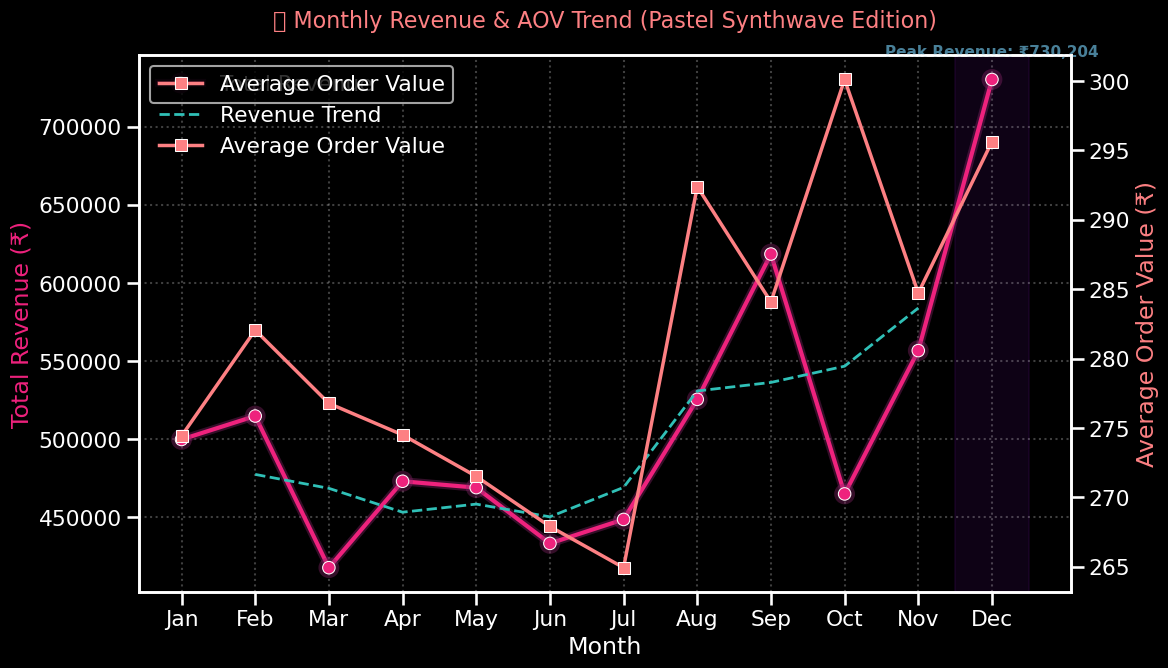

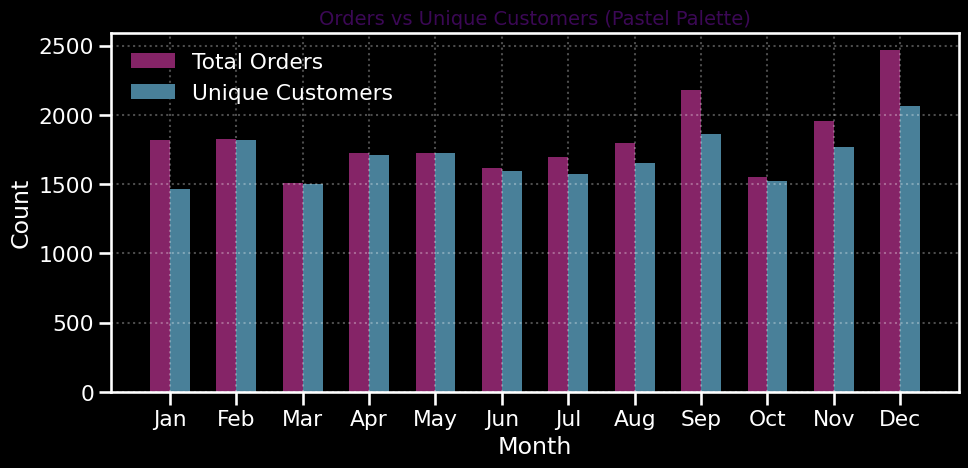

In [19]:
# ==== Synthwave pastel palette ====
palette = ["#3B0855", "#852467", "#FD8083", "#EE227D", "#498099", "#30C0B7"]

# ==== Style settings ====
plt.style.use("dark_background")
sns.set_context("talk", font_scale=0.95)
sns.set_palette(palette)

# ==== 1️⃣ Revenue + AOV Trend ====
fig, ax1 = plt.subplots(figsize=(12, 7))

# Revenue line
rev_line = sns.lineplot(
    x='purchase_month', y='total_revenue', data=monthly_summary,
    color=palette[3], linewidth=3, marker='o', ax=ax1, label='Total Revenue'
)

# Glow effect
for line in rev_line.lines:
    line.set_path_effects([
        path_effects.Stroke(linewidth=6, foreground=palette[1], alpha=0.4),
        path_effects.Normal()
    ])

# Smooth trend (rolling)
monthly_summary['rev_trend'] = monthly_summary['total_revenue'].rolling(3, center=True).mean()
sns.lineplot(
    x='purchase_month', y='rev_trend', data=monthly_summary,
    color=palette[5], linewidth=2, linestyle='--', label='Revenue Trend', ax=ax1
)

# Secondary axis for AOV
ax2 = ax1.twinx()
sns.lineplot(
    x='purchase_month', y='aov', data=monthly_summary,
    color=palette[2], linewidth=2.5, marker='s', ax=ax2, label='Average Order Value'
)

# Highlight peak revenue month
max_month = monthly_summary.loc[monthly_summary['total_revenue'].idxmax(), 'purchase_month']
max_value = monthly_summary['total_revenue'].max()
ax1.axvspan(max_month - 0.5, max_month + 0.5, color=palette[0], alpha=0.25)
ax1.text(max_month, max_value * 1.02,
         f"Peak Revenue: ₹{max_value:,.0f}",
         color=palette[4], ha='center', fontsize=11, fontweight='bold')

# Titles and labels
ax1.set_title("💾 Monthly Revenue & AOV Trend (Pastel Synthwave Edition)",
              fontsize=16, color="#FD8083", pad=20)
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Revenue (₹)", color=palette[3])
ax2.set_ylabel("Average Order Value (₹)", color=palette[2])
ax1.grid(alpha=0.25, linestyle=':')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", frameon=False)

plt.tight_layout()
plt.show()

# ==== 2️⃣ Orders vs Unique Customers ====
plt.figure(figsize=(10, 5))
bar = plt.bar(monthly_summary['purchase_month'] - 0.15, monthly_summary['total_orders'],
              width=0.3, color=palette[1], label='Total Orders')
plt.bar(monthly_summary['purchase_month'] + 0.15, monthly_summary['unique_customers'],
        width=0.3, color=palette[4], label='Unique Customers')

plt.title("Orders vs Unique Customers (Pastel Palette)", fontsize=14, color=palette[0])
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(monthly_summary['purchase_month'],
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()


C:\Users\shaif\AppData\Local\Temp\ipykernel_7844\2087418627.py:71: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=3.0)
c:\Users\shaif\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


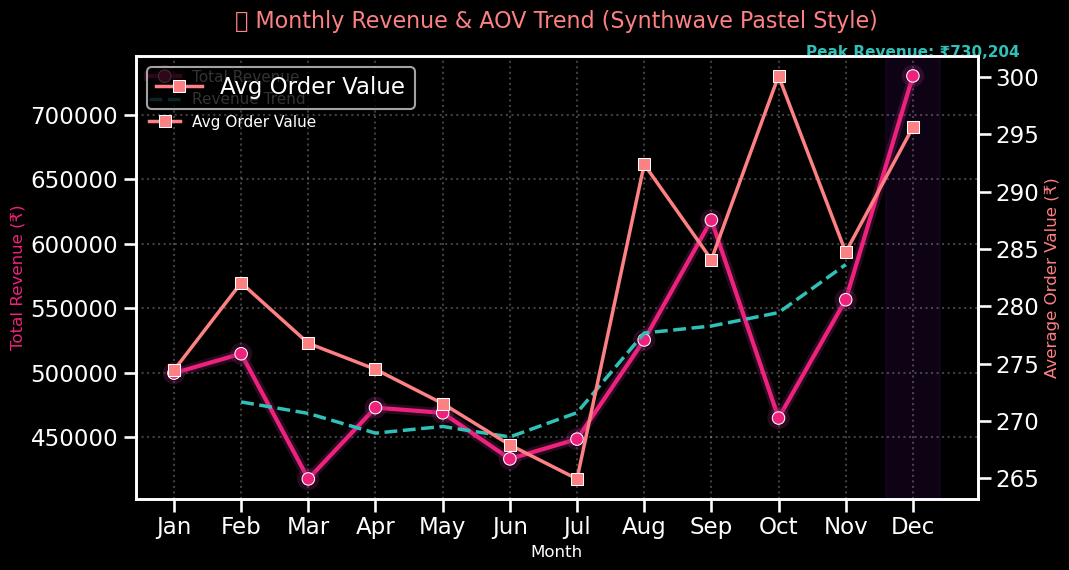

In [20]:
palette = ["#3B0855", "#852467", "#FD8083", "#EE227D", "#498099", "#30C0B7"]

# ====== Style Setup ======
plt.style.use("dark_background")
sns.set_context("talk", font_scale=1.0)
sns.set_palette(palette)

fig, ax1 = plt.subplots(figsize=(12, 7))

# ====== Revenue Line ======
rev_color = palette[3]  # bright magenta
aov_color = palette[2]  # coral pink
trend_color = palette[5]  # turquoise

rev_line = sns.lineplot(
    x='purchase_month', y='total_revenue', data=monthly_summary,
    linewidth=3, marker='o', color=rev_color, ax=ax1, label='Total Revenue'
)

# Glow effect for revenue line
for line in rev_line.lines:
    line.set_path_effects([
        path_effects.Stroke(linewidth=7, foreground=palette[1], alpha=0.3),
        path_effects.Normal()
    ])

# ====== Revenue Trendline ======
monthly_summary['rev_trend'] = monthly_summary['total_revenue'].rolling(3, center=True).mean()
sns.lineplot(
    x='purchase_month', y='rev_trend', data=monthly_summary,
    color=trend_color, linewidth=2.5, linestyle='--', label='Revenue Trend', ax=ax1
)

# ====== Secondary Axis: AOV ======
ax2 = ax1.twinx()
sns.lineplot(
    x='purchase_month', y='aov', data=monthly_summary,
    linewidth=2.5, marker='s', color=aov_color, ax=ax2, label='Avg Order Value'
)

# ====== Highlight peak revenue month ======
max_month = monthly_summary.loc[monthly_summary['total_revenue'].idxmax(), 'purchase_month']
max_value = monthly_summary['total_revenue'].max()

ax1.axvspan(max_month - 0.4, max_month + 0.4, color=palette[0], alpha=0.25)
ax1.text(max_month, max_value * 1.02,
         f"Peak Revenue: ₹{max_value:,.0f}",
         color=trend_color, ha='center', fontsize=11, fontweight='bold')

# ====== Titles & Labels ======
ax1.set_title("💾 Monthly Revenue & AOV Trend (Synthwave Pastel Style)",
              fontsize=16, color=aov_color, pad=20)
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Total Revenue (₹)", color=rev_color, fontsize=12)
ax2.set_ylabel("Average Order Value (₹)", color=aov_color, fontsize=12)

# ====== X-Axis & Grid ======
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.grid(alpha=0.25, linestyle=':')

# ====== Fix overlapping legends ======
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Remove duplicates
combined = dict(zip(labels_1 + labels_2, lines_1 + lines_2))
ax1.legend(combined.values(), combined.keys(), loc="upper left",
           frameon=False, fontsize=11, labelcolor="white")

plt.tight_layout(pad=3.0)
plt.show()

C:\Users\shaif\AppData\Local\Temp\ipykernel_7844\94955017.py:57: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\shaif\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


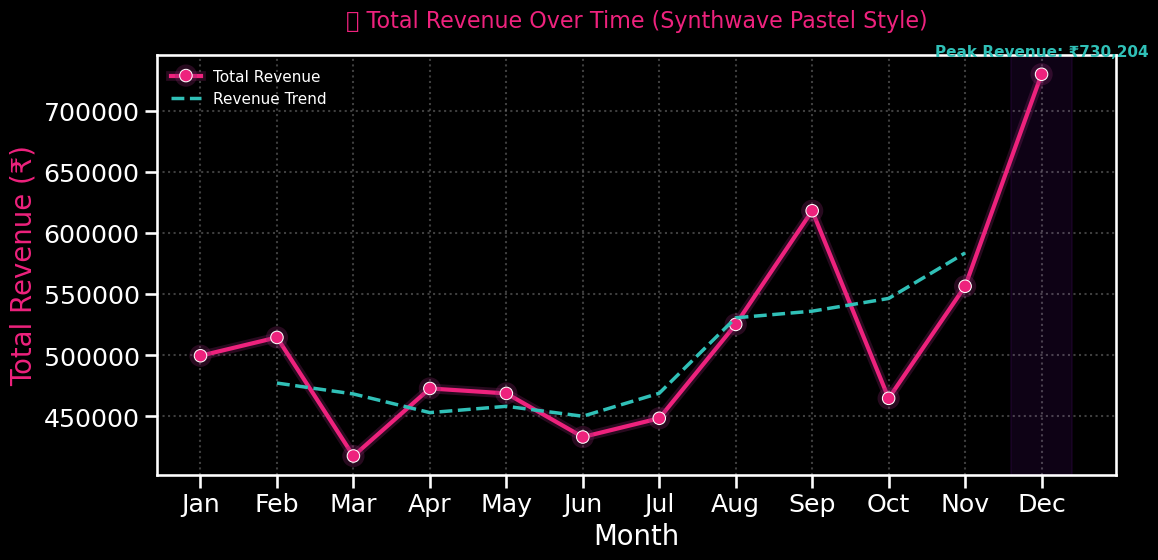

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

# ==== Synthwave Pastel Palette ====
palette = ["#3B0855", "#852467", "#FD8083", "#EE227D", "#498099", "#30C0B7"]

# ==== Style ====
plt.style.use("dark_background")
sns.set_context("talk", font_scale=1.1)

fig, ax = plt.subplots(figsize=(12, 6))

# ==== Revenue Line ====
rev_color = palette[3]  # vibrant pink
trend_color = palette[5]  # cyan-turquoise

rev_plot = sns.lineplot(
    x='purchase_month', y='total_revenue', data=monthly_summary,
    color=rev_color, linewidth=3, marker='o', ax=ax, label='Total Revenue'
)

# Glow effect
for line in rev_plot.lines:
    line.set_path_effects([
        path_effects.Stroke(linewidth=7, foreground=palette[1], alpha=0.3),
        path_effects.Normal()
    ])

# ==== Trendline (Rolling Mean) ====
monthly_summary['rev_trend'] = monthly_summary['total_revenue'].rolling(3, center=True).mean()
sns.lineplot(
    x='purchase_month', y='rev_trend', data=monthly_summary,
    color=trend_color, linewidth=2.5, linestyle='--', label='Revenue Trend'
)

# ==== Highlight Peak Month ====
max_month = monthly_summary.loc[monthly_summary['total_revenue'].idxmax(), 'purchase_month']
max_value = monthly_summary['total_revenue'].max()
ax.axvspan(max_month - 0.4, max_month + 0.4, color=palette[0], alpha=0.25)
ax.text(max_month, max_value * 1.02,
        f"Peak Revenue: ₹{max_value:,.0f}",
        color=trend_color, ha='center', fontsize=11, fontweight='bold')

# ==== Labels, Title, Grid ====
ax.set_title("💾 Total Revenue Over Time (Synthwave Pastel Style)",
             fontsize=16, color=rev_color, pad=20)
ax.set_xlabel("Month")
ax.set_ylabel("Total Revenue (₹)", color=rev_color)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.grid(alpha=0.25, linestyle=':')

# ==== Legend ====
ax.legend(frameon=False, loc="upper left", fontsize=11, labelcolor="white")

plt.tight_layout()
plt.show()
